<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-scenario-results" data-toc-modified-id="Load-scenario-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load scenario results</a></span><ul class="toc-item"><li><span><a href="#Baselines" data-toc-modified-id="Baselines-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baselines</a></span></li><li><span><a href="#Scenarios" data-toc-modified-id="Scenarios-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scenarios</a></span><ul class="toc-item"><li><span><a href="#Baseline-response-to-different-sizes-of-shocks" data-toc-modified-id="Baseline-response-to-different-sizes-of-shocks-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Baseline response to different sizes of shocks</a></span></li><li><span><a href="#Marginal-displacement-response-to-different-MPE" data-toc-modified-id="Marginal-displacement-response-to-different-MPE-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Marginal displacement response to different MPE</a></span></li><li><span><a href="#Marginal-displacement-response-to-different-RPE" data-toc-modified-id="Marginal-displacement-response-to-different-RPE-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Marginal displacement response to different RPE</a></span></li><li><span><a href="#Marginal-displacement-response-to-different-SRE" data-toc-modified-id="Marginal-displacement-response-to-different-SRE-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Marginal displacement response to different SRE</a></span></li><li><span><a href="#Marginal-displacement-response-to-different-DE" data-toc-modified-id="Marginal-displacement-response-to-different-DE-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Marginal displacement response to different DE</a></span></li><li><span><a href="#Marginal-displacement-response-to-different-SSDE" data-toc-modified-id="Marginal-displacement-response-to-different-SSDE-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Marginal displacement response to different SSDE</a></span></li></ul></li></ul></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visual analysis</a></span><ul class="toc-item"><li><span><a href="#S&amp;D-snalysis" data-toc-modified-id="S&amp;D-snalysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>S&amp;D snalysis</a></span><ul class="toc-item"><li><span><a href="#Mining-S&amp;D" data-toc-modified-id="Mining-S&amp;D-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Mining S&amp;D</a></span></li><li><span><a href="#Cathode-S&amp;D" data-toc-modified-id="Cathode-S&amp;D-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Cathode S&amp;D</a></span></li><li><span><a href="#Scrap-S&amp;D" data-toc-modified-id="Scrap-S&amp;D-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Scrap S&amp;D</a></span></li></ul></li><li><span><a href="#Price-analysis" data-toc-modified-id="Price-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Price analysis</a></span><ul class="toc-item"><li><span><a href="#Cathode-price" data-toc-modified-id="Cathode-price-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cathode price</a></span></li><li><span><a href="#TCRC" data-toc-modified-id="TCRC-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>TCRC</a></span></li><li><span><a href="#No.2-spread" data-toc-modified-id="No.2-spread-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>No.2 spread</a></span></li><li><span><a href="#No.2-spread-and-cathode-corr" data-toc-modified-id="No.2-spread-and-cathode-corr-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>No.2 spread and cathode corr</a></span></li></ul></li><li><span><a href="#Displacement" data-toc-modified-id="Displacement-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Displacement</a></span></li><li><span><a href="#Mining-response" data-toc-modified-id="Mining-response-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Mining response</a></span></li><li><span><a href="#Shock" data-toc-modified-id="Shock-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Shock</a></span></li><li><span><a href="#Mine-level-investigation" data-toc-modified-id="Mine-level-investigation-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Mine level investigation</a></span></li></ul></li><li><span><a href="#Marginal-displacements" data-toc-modified-id="Marginal-displacements-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Marginal displacements</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
idx = pd.IndexSlice
import random 
from scipy import stats
from displacement_package.useful_functions import *
init_plot2()

In [3]:
sd_baseline_baseline=pd.read_excel('S&D baseline_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_baseline=sd_baseline_baseline.loc['19600101':, 'Scrap production']
mining_supply_baseline_baseline=sd_baseline_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [4]:
def dislpacement_estimate(sd_scenario, scrap_baseline=scrap_supply_baseline_baseline, 
                          mining_baseline=mining_supply_baseline_baseline):
    scrap_supply_scenario=sd_scenario.loc['19600101':, 'Scrap production']
    mining_supply_scenario=sd_scenario.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)
    shock_scenario=scrap_supply_scenario-scrap_baseline
    mining_response_scenario=mining_supply_scenario-mining_baseline
    displacement_scenario=mining_response_scenario.cumsum().div(shock_scenario.cumsum()).mul(-1)
    
    dis_results=pd.DataFrame({'Shock': shock_scenario, 'Mining response': mining_response_scenario, 
                              'Displacement': displacement_scenario})
    return dis_results

# Load scenario results

## Baselines

Baseline baseline

Mining production elasticity (MPE)

In [5]:
sd_low_mpe_baseline=pd.read_excel('S&D low_mpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_low_mpe_baseline=sd_low_mpe_baseline.loc['19600101':, 'Scrap production']
mining_supply_low_mpe_baseline=sd_low_mpe_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [6]:
sd_high_mpe_baseline=pd.read_excel('S&D high_mpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_high_mpe_baseline=sd_high_mpe_baseline.loc['19600101':, 'Scrap production']
mining_supply_high_mpe_baseline=sd_high_mpe_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

Refinery production elasticity (RPE)

In [7]:
sd_low_rpe_baseline=pd.read_excel('S&D low_rpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_low_rpe_baseline=sd_low_rpe_baseline.loc['19600101':, 'Scrap production']
mining_supply_low_rpe_baseline=sd_low_rpe_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [8]:
sd_high_rpe_baseline=pd.read_excel('S&D high_rpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_high_rpe_baseline=sd_high_rpe_baseline.loc['19600101':, 'Scrap production']
mining_supply_high_rpe_baseline=sd_high_rpe_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

Secondary ratio elasticity (SRE)

In [9]:
sd_low_sre_baseline=pd.read_excel('S&D low_sre_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_low_sre_baseline=sd_low_sre_baseline.loc['19600101':, 'Scrap production']
mining_supply_low_sre_baseline=sd_low_sre_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [10]:
sd_high_sre_baseline=pd.read_excel('S&D high_sre_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_high_sre_baseline=sd_high_sre_baseline.loc['19600101':, 'Scrap production']
mining_supply_high_sre_baseline=sd_high_sre_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

Demand elasticity (DE)

In [11]:
sd_200_de_baseline=pd.read_excel('S&D 200_de_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_200_de_baseline=sd_200_de_baseline.loc['19600101':, 'Scrap production']
mining_supply_200_de_baseline=sd_200_de_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [12]:
sd_400_de_baseline=pd.read_excel('S&D 400_de_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_400_de_baseline=sd_400_de_baseline.loc['19600101':, 'Scrap production']
mining_supply_400_de_baseline=sd_400_de_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

Scrap S&D elasticity (SSDE)

In [13]:
sd_low_ssde_baseline=pd.read_excel('S&D low_ssde_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_low_ssde_baseline=sd_low_ssde_baseline.loc['19600101':, 'Scrap production']
mining_supply_low_ssde_baseline=sd_low_ssde_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [14]:
sd_high_ssde_baseline=pd.read_excel('S&D high_ssde_baseline.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_high_ssde_baseline=sd_high_ssde_baseline.loc['19600101':, 'Scrap production']
mining_supply_high_ssde_baseline=sd_high_ssde_baseline.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

## Scenarios

Duration of marginal shocks

In [15]:
sd_baseline_sm=pd.read_excel('S&D baseline_sm.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_sm=sd_baseline_sm.loc['19600101':, 'Scrap production']
mining_supply_baseline_sm=sd_baseline_sm.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [16]:
sd_baseline_lsm=pd.read_excel('S&D baseline_lsm.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_lsm=sd_baseline_lsm.loc['19600101':, 'Scrap production']
mining_supply_baseline_lsm=sd_baseline_lsm.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [17]:
sd_baseline_psm=pd.read_excel('S&D baseline_psm.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_psm=sd_baseline_psm.loc['19600101':, 'Scrap production']
mining_supply_baseline_psm=sd_baseline_psm.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

Size of shock

In [18]:
sd_baseline_prs10=pd.read_excel('With sp2 constraint/S&D baseline_prs10.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_prs10=sd_baseline_prs10.loc['19600101':, 'Scrap production']
mining_supply_baseline_prs10=sd_baseline_prs10.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [19]:
sd_baseline_prs20=pd.read_excel('With sp2 constraint/S&D baseline_prs20.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_prs20=sd_baseline_prs20.loc['19600101':, 'Scrap production']
mining_supply_baseline_prs20=sd_baseline_prs20.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [20]:
sd_baseline_prs50=pd.read_excel('With sp2 constraint/S&D baseline_prs50.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_prs50=sd_baseline_prs50.loc['19600101':, 'Scrap production']
mining_supply_baseline_prs50=sd_baseline_prs50.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [21]:
sd_baseline_prs100=pd.read_excel('With sp2 constraint/S&D baseline_prs100.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_prs100=sd_baseline_prs100.loc['19600101':, 'Scrap production']
mining_supply_baseline_prs100=sd_baseline_prs100.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

China import ban

In [22]:
sd_china_ban_reuter1=pd.read_excel('S&D china_ban_reuter1.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_reuter1=sd_china_ban_reuter1.loc['19600101':, 'Scrap production']
mining_supply_china_ban_reuter1=sd_china_ban_reuter1.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [23]:
sd_china_ban_reuter5=pd.read_excel('S&D china_ban_reuter5.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_reuter5=sd_china_ban_reuter5.loc['19600101':, 'Scrap production']
mining_supply_china_ban_reuter5=sd_china_ban_reuter5.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [24]:
sd_china_ban_reuterall=pd.read_excel('S&D china_ban_reuterall.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_reuterall=sd_china_ban_reuterall.loc['19600101':, 'Scrap production']
mining_supply_china_ban_reuterall=sd_china_ban_reuterall.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [25]:
sd_china_ban_smm1=pd.read_excel('S&D china_ban_smm1.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_smm1=sd_china_ban_smm1.loc['19600101':, 'Scrap production']
mining_supply_china_ban_smm1=sd_china_ban_smm1.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [26]:
sd_china_ban_smm5=pd.read_excel('S&D china_ban_smm5.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_smm5=sd_china_ban_smm5.loc['19600101':, 'Scrap production']
mining_supply_china_ban_smm5=sd_china_ban_smm5.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

In [27]:
sd_china_ban_smmall=pd.read_excel('S&D china_ban_smmall.xlsx', sheet_name='Sheet1', index_col=0)
scrap_supply_china_ban_smmall=sd_china_ban_smmall.loc['19600101':, 'Scrap production']
mining_supply_china_ban_smmall=sd_china_ban_smmall.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

### Baseline response to different sizes of shocks

In [28]:
sd_baseline_sm=pd.read_excel('S&D baseline_sm.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_lsm=pd.read_excel('S&D baseline_lsm.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_psm=pd.read_excel('S&D baseline_psm.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_5sm=pd.read_excel('S&D baseline_5sm.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_10sm=pd.read_excel('S&D baseline_10sm.xlsx', sheet_name='Sheet1', index_col=0)


sd_baseline_rs10=pd.read_excel('S&D baseline_rs10.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_rs20=pd.read_excel('S&D baseline_rs20.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_rs50=pd.read_excel('S&D baseline_rs50.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_rs100=pd.read_excel('S&D baseline_rs100.xlsx', sheet_name='Sheet1', index_col=0)

sd_baseline_prs10=pd.read_excel('With sp2 constraint/S&D baseline_prs10.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_prs20=pd.read_excel('With sp2 constraint/S&D baseline_prs20.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_prs50=pd.read_excel('With sp2 constraint/S&D baseline_prs50.xlsx', sheet_name='Sheet1', index_col=0)
sd_baseline_prs100=pd.read_excel('With sp2 constraint/S&D baseline_prs100.xlsx', sheet_name='Sheet1', index_col=0)

sd_baseline_irs100=pd.read_excel('S&D baseline_irs100.xlsx', sheet_name='Sheet1', index_col=0)

sd_china_ban_reuter1=pd.read_excel('S&D china_ban_reuter1.xlsx', sheet_name='Sheet1', index_col=0)
sd_china_ban_reuter5=pd.read_excel('S&D china_ban_reuter5.xlsx', sheet_name='Sheet1', index_col=0)
sd_china_ban_reuterall=pd.read_excel('S&D china_ban_reuterall.xlsx', sheet_name='Sheet1', index_col=0)
sd_china_ban_smm1=pd.read_excel('S&D china_ban_smm1.xlsx', sheet_name='Sheet1', index_col=0)
sd_china_ban_smm5=pd.read_excel('S&D china_ban_smm5.xlsx', sheet_name='Sheet1', index_col=0)
sd_china_ban_smmall=pd.read_excel('S&D china_ban_smmall.xlsx', sheet_name='Sheet1', index_col=0)

In [29]:
displacement_baseline_sm=dislpacement_estimate(sd_baseline_sm).loc[:, 'Displacement']
displacement_baseline_lsm=dislpacement_estimate(sd_baseline_lsm).loc[:, 'Displacement']
displacement_baseline_psm=dislpacement_estimate(sd_baseline_psm).loc[:, 'Displacement']
displacement_baseline_5sm=dislpacement_estimate(sd_baseline_5sm).loc[:, 'Displacement']
displacement_baseline_10sm=dislpacement_estimate(sd_baseline_10sm).loc[:, 'Displacement']

displacement_baseline_rs10=dislpacement_estimate(sd_baseline_rs10).loc[:, 'Displacement']
displacement_baseline_rs20=dislpacement_estimate(sd_baseline_rs20).loc[:, 'Displacement']
displacement_baseline_rs50=dislpacement_estimate(sd_baseline_rs50).loc[:, 'Displacement']
displacement_baseline_rs100=dislpacement_estimate(sd_baseline_rs100).loc[:, 'Displacement']

displacement_baseline_prs10=dislpacement_estimate(sd_baseline_prs10).loc[:, 'Displacement']
displacement_baseline_prs20=dislpacement_estimate(sd_baseline_prs20).loc[:, 'Displacement']
displacement_baseline_prs50=dislpacement_estimate(sd_baseline_prs50).loc[:, 'Displacement']
displacement_baseline_prs100=dislpacement_estimate(sd_baseline_prs100).loc[:, 'Displacement']

displacement_baseline_irs100=dislpacement_estimate(sd_baseline_irs100).loc[:, 'Displacement']

displacement_china_ban_reuter1=dislpacement_estimate(sd_china_ban_reuter1).loc[:, 'Displacement']
displacement_china_ban_reuter5=dislpacement_estimate(sd_china_ban_reuter5).loc[:, 'Displacement']
displacement_china_ban_reuterall=dislpacement_estimate(sd_china_ban_reuterall).loc[:, 'Displacement']
displacement_china_ban_smm1=dislpacement_estimate(sd_china_ban_smm1).loc[:, 'Displacement']
displacement_china_ban_smm5=dislpacement_estimate(sd_china_ban_smm5).loc[:, 'Displacement']
displacement_china_ban_smmall=dislpacement_estimate(sd_china_ban_smmall).loc[:, 'Displacement']

In [30]:
mining_response_baseline_sm=dislpacement_estimate(sd_baseline_sm).loc[:, 'Mining response']
mining_response_baseline_lsm=dislpacement_estimate(sd_baseline_lsm).loc[:, 'Mining response']
mining_response_baseline_psm=dislpacement_estimate(sd_baseline_psm).loc[:, 'Mining response']

mining_response_baseline_rs10=dislpacement_estimate(sd_baseline_rs10).loc[:, 'Mining response']
mining_response_baseline_rs20=dislpacement_estimate(sd_baseline_rs20).loc[:, 'Mining response']
mining_response_baseline_rs50=dislpacement_estimate(sd_baseline_rs50).loc[:, 'Mining response']
mining_response_baseline_rs100=dislpacement_estimate(sd_baseline_rs100).loc[:, 'Mining response']

mining_response_baseline_prs10=dislpacement_estimate(sd_baseline_prs10).loc[:, 'Mining response']
mining_response_baseline_prs20=dislpacement_estimate(sd_baseline_prs20).loc[:, 'Mining response']
mining_response_baseline_prs50=dislpacement_estimate(sd_baseline_prs50).loc[:, 'Mining response']
mining_response_baseline_prs100=dislpacement_estimate(sd_baseline_prs100).loc[:, 'Mining response']

mining_response_baseline_irs100=dislpacement_estimate(sd_baseline_irs100).loc[:, 'Mining response']

mining_response_china_ban_reuter1=dislpacement_estimate(sd_china_ban_reuter1).loc[:, 'Mining response']
mining_response_china_ban_reuter5=dislpacement_estimate(sd_china_ban_reuter5).loc[:, 'Mining response']
mining_response_china_ban_reuterall=dislpacement_estimate(sd_china_ban_reuterall).loc[:, 'Mining response']
mining_response_china_ban_smm1=dislpacement_estimate(sd_china_ban_smm1).loc[:, 'Mining response']
mining_response_china_ban_smm5=dislpacement_estimate(sd_china_ban_smm5).loc[:, 'Mining response']
mining_response_china_ban_smmall=dislpacement_estimate(sd_china_ban_smmall).loc[:, 'Mining response']

In [31]:
shock_baseline_sm=dislpacement_estimate(sd_baseline_sm).loc[:, 'Shock']
shock_baseline_lsm=dislpacement_estimate(sd_baseline_lsm).loc[:, 'Shock']
shock_baseline_psm=dislpacement_estimate(sd_baseline_psm).loc[:, 'Shock']

shock_baseline_rs10=dislpacement_estimate(sd_baseline_rs10).loc[:, 'Shock']
shock_baseline_rs20=dislpacement_estimate(sd_baseline_rs20).loc[:, 'Shock']
shock_baseline_rs50=dislpacement_estimate(sd_baseline_rs50).loc[:, 'Shock']
shock_baseline_rs100=dislpacement_estimate(sd_baseline_rs100).loc[:, 'Shock']

shock_baseline_prs10=dislpacement_estimate(sd_baseline_prs10).loc[:, 'Shock']
shock_baseline_prs20=dislpacement_estimate(sd_baseline_prs20).loc[:, 'Shock']
shock_baseline_prs50=dislpacement_estimate(sd_baseline_prs50).loc[:, 'Shock']
shock_baseline_prs100=dislpacement_estimate(sd_baseline_prs100).loc[:, 'Shock']

shock_baseline_irs100=dislpacement_estimate(sd_baseline_irs100).loc[:, 'Shock']

shock_china_ban_reuter1=dislpacement_estimate(sd_china_ban_reuter1).loc[:, 'Shock']
shock_china_ban_reuter5=dislpacement_estimate(sd_china_ban_reuter5).loc[:, 'Shock']
shock_china_ban_reuterall=dislpacement_estimate(sd_china_ban_reuterall).loc[:, 'Shock']
shock_china_ban_smm1=dislpacement_estimate(sd_china_ban_smm1).loc[:, 'Shock']
shock_china_ban_smm5=dislpacement_estimate(sd_china_ban_smm5).loc[:, 'Shock']
shock_china_ban_smmall=dislpacement_estimate(sd_china_ban_smmall).loc[:, 'Shock']

### Marginal displacement response to different MPE

In [32]:
sd_low_mpe_sm=pd.read_excel('S&D low_mpe_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_low_mpe_sm=\
dislpacement_estimate(sd_low_mpe_sm, mining_baseline=mining_supply_low_mpe_baseline, 
                      scrap_baseline=scrap_supply_low_mpe_baseline).loc[:, 'Displacement']

In [33]:
sd_high_mpe_sm=pd.read_excel('S&D high_mpe_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_high_mpe_sm=\
dislpacement_estimate(sd_high_mpe_sm, mining_baseline=mining_supply_high_mpe_baseline, 
                      scrap_baseline=scrap_supply_high_mpe_baseline).loc[:, 'Displacement']

### Marginal displacement response to different RPE

In [34]:
sd_low_rpe_sm=pd.read_excel('S&D low_rpe_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_low_rpe_sm=\
dislpacement_estimate(sd_low_rpe_sm, mining_baseline=mining_supply_low_rpe_baseline, 
                      scrap_baseline=scrap_supply_low_rpe_baseline).loc[:, 'Displacement']

In [35]:
sd_high_rpe_sm=pd.read_excel('S&D high_rpe_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_high_rpe_sm=\
dislpacement_estimate(sd_high_rpe_sm, mining_baseline=mining_supply_high_rpe_baseline, 
                      scrap_baseline=scrap_supply_high_rpe_baseline).loc[:, 'Displacement']

### Marginal displacement response to different SRE

In [36]:
sd_low_sre_sm=pd.read_excel('S&D low_sre_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_low_sre_sm=\
dislpacement_estimate(sd_low_sre_sm, mining_baseline=mining_supply_low_sre_baseline, 
                      scrap_baseline=scrap_supply_low_sre_baseline).loc[:, 'Displacement']

In [37]:
sd_high_sre_sm=pd.read_excel('S&D high_sre_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_high_sre_sm=\
dislpacement_estimate(sd_high_sre_sm, mining_baseline=mining_supply_high_sre_baseline, 
                      scrap_baseline=scrap_supply_high_sre_baseline).loc[:, 'Displacement']

### Marginal displacement response to different DE

In [38]:
sd_200_de_sm=pd.read_excel('S&D 200_de_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_200_de_sm=\
dislpacement_estimate(sd_200_de_sm, mining_baseline=mining_supply_200_de_baseline, 
                      scrap_baseline=scrap_supply_200_de_baseline).loc[:, 'Displacement']

In [39]:
sd_400_de_sm=pd.read_excel('S&D 400_de_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_400_de_sm=\
dislpacement_estimate(sd_400_de_sm, mining_baseline=mining_supply_400_de_baseline, 
                      scrap_baseline=scrap_supply_400_de_baseline).loc[:, 'Displacement']

### Marginal displacement response to different SSDE

In [40]:
sd_low_ssde_sm=pd.read_excel('S&D low_ssde_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_low_ssde_sm=\
dislpacement_estimate(sd_low_ssde_sm, mining_baseline=mining_supply_low_ssde_baseline, 
                      scrap_baseline=scrap_supply_low_ssde_baseline).loc[:, 'Displacement']

In [41]:
sd_high_ssde_sm=pd.read_excel('S&D high_ssde_sm.xlsx', sheet_name='Sheet1', index_col=0)

displacement_high_ssde_sm=\
dislpacement_estimate(sd_high_ssde_sm, mining_baseline=mining_supply_high_ssde_baseline, 
                      scrap_baseline=scrap_supply_high_ssde_baseline).loc[:, 'Displacement']

In [65]:
marginal_sd = pd.concat([sd_baseline_sm,sd_low_mpe_sm,sd_high_mpe_sm,sd_low_sre_sm,sd_high_sre_sm,sd_low_ssde_sm,sd_high_ssde_sm,sd_200_de_sm,sd_400_de_sm],keys=['Baseline','Low MPE','High MPE','Low SRE','High SRE','Low SSDE','High SSDE','Low DE','High DE'])
marginal_displacement = pd.concat([displacement_baseline_sm,displacement_low_mpe_sm,displacement_high_mpe_sm,displacement_low_sre_sm,displacement_high_sre_sm,displacement_low_ssde_sm,displacement_high_ssde_sm,displacement_200_de_sm,displacement_400_de_sm],keys=['Baseline','Low MPE','High MPE','Low SRE','High SRE','Low SSDE','High SSDE','Low DE','High DE'],axis=1)

# Visual analysis

## S&D snalysis

In [41]:
sd_mining_baseline_baseline=sd_baseline_baseline.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_baseline=sd_baseline_baseline.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_baseline=sd_baseline_baseline.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [42]:
sd_mining_baseline_sm=sd_baseline_sm.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_sm=sd_baseline_sm.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_sm=sd_baseline_sm.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [43]:
sd_mining_baseline_lsm=sd_baseline_lsm.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_lsm=sd_baseline_lsm.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_lsm=sd_baseline_lsm.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [44]:
sd_mining_baseline_psm=sd_baseline_psm.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_psm=sd_baseline_psm.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_psm=sd_baseline_psm.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [45]:
sd_mining_baseline_rs10=sd_baseline_rs10.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_rs10=sd_baseline_rs10.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_rs10=sd_baseline_rs10.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [46]:
sd_mining_baseline_rs20=sd_baseline_rs20.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_rs20=sd_baseline_rs20.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_rs20=sd_baseline_rs20.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [47]:
sd_mining_baseline_rs50=sd_baseline_rs50.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_rs50=sd_baseline_rs50.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_rs50=sd_baseline_rs50.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [48]:
sd_mining_baseline_rs100=sd_baseline_rs100.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_rs100=sd_baseline_rs100.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_rs100=sd_baseline_rs100.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [49]:
sd_mining_baseline_prs10=sd_baseline_prs10.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_prs10=sd_baseline_prs10.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_prs10=sd_baseline_prs10.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [50]:
sd_mining_baseline_prs20=sd_baseline_prs20.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_prs20=sd_baseline_prs20.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_prs20=sd_baseline_prs20.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [51]:
sd_mining_baseline_prs50=sd_baseline_prs50.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_prs50=sd_baseline_prs50.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_prs50=sd_baseline_prs50.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [52]:
sd_mining_baseline_prs100=sd_baseline_prs100.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_prs100=sd_baseline_prs100.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_prs100=sd_baseline_prs100.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [53]:
sd_mining_baseline_irs100=sd_baseline_irs100.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_baseline_irs100=sd_baseline_irs100.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_baseline_irs100=sd_baseline_irs100.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

In [54]:
sd_mining_400_de_baseline=sd_400_de_baseline.loc[:, ['Concentrate production', 'SX-EW production', 'Concentrate demand']]
sd_cathode_400_de_baseline=sd_400_de_baseline.loc[:, ['Primary refining production', 'Secondary refining production', 
                                                  'SX-EW production.1', 'Refined demand']]
sd_scrap_400_de_baseline=sd_400_de_baseline.loc[:, ['Scrap production', 'Direct melt scrap', 'Refined scrap']]

### Mining S&D

In [95]:
10466/sd_mining_baseline_baseline.iloc[:, [0,1]].sum(axis=1)[69:].sum()

0.020335075640208047

<IPython.core.display.Javascript object>


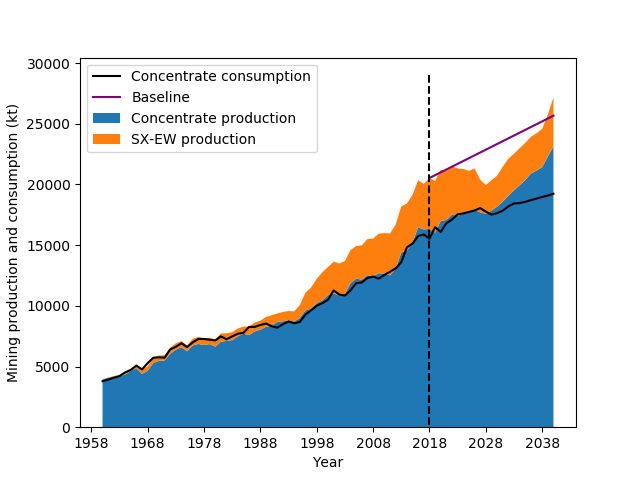

In [55]:
%matplotlib notebook
#plt.style.use('ggplot')
plt.stackplot(sd_mining_baseline_prs100.iloc[10:, :2].index, sd_mining_baseline_prs100.iloc[10:, :2].transpose(), 
              labels=sd_mining_baseline_prs100.iloc[10:, :2].columns)
plt.plot(sd_mining_baseline_prs100.iloc[10:, 2], 'k', label='Concentrate consumption')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2040,1,1)], [20531, 25663], 'purple', label='Baseline')
plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [200, 29000], 'k--')

plt.legend(loc=2)
plt.xlabel('Year')
plt.ylabel('Mining production and consumption (kt)')
plt.show()

### Cathode S&D

<IPython.core.display.Javascript object>


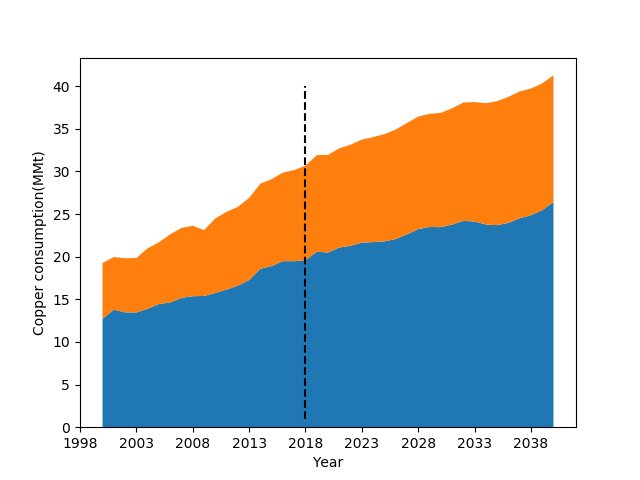

In [57]:
%matplotlib notebook
#plt.style.use('ggplot')
#plt.rcParams['figure.figsize']=[3,2]
plt.stackplot(sd_cathode_baseline_baseline.iloc[50:, :3].index, sd_cathode_baseline_baseline.iloc[50:, 0].div(1e3)+\
              sd_cathode_baseline_baseline.iloc[50:, 2].div(1e3), sd_cathode_baseline_baseline.iloc[50:, 1].div(1e3)+\
              sd_scrap_baseline_baseline.iloc[50:, 1].div(1e3))
#              labels=['Primary refined production', 'Secondary refined production', 'SX-EW production'])
#plt.plot(sd_cathode_baseline_baseline.iloc[10:, 3], 'k', label='Cathode consumption')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [1, 40], 'k--')
#plt.legend(loc=2)
#plt.ylim(0, 32)
plt.xlabel('Year')
plt.ylabel('Copper consumption(MMt)')
#plt.title('Cathode S&D (ktonnes)')
#plt.axis('off')

plt.show()

### Scrap S&D

<IPython.core.display.Javascript object>


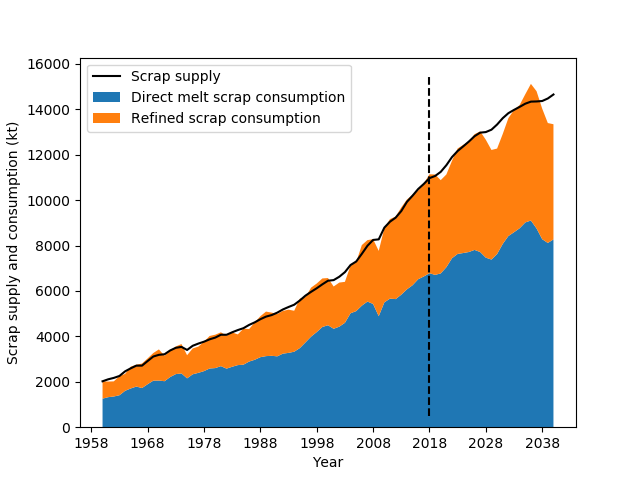

In [58]:
%matplotlib notebook
plt.plot(sd_scrap_400_de_baseline.iloc[10:, 0], 'k', label='Scrap supply')
plt.stackplot(sd_scrap_400_de_baseline.iloc[10:, 1:].index, sd_scrap_400_de_baseline.iloc[10:, 1:].transpose(), 
              labels=['Direct melt scrap consumption', 'Refined scrap consumption'])

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [500, 15500], 'k--')
plt.xlabel('Year')
plt.ylabel('Scrap supply and consumption (kt)')
plt.legend()
plt.show()

## Price analysis

Baselines

In [2]:
price_baseline_baseline=pd.read_excel('price baseline_baseline.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_baseline=price_baseline_baseline.loc[:, 'Cathode']
sp2_series_baseline_baseline=price_baseline_baseline.loc[:, 'No.2 spread']
tcrc_series_baseline_baseline=price_baseline_baseline.loc[:, 'TCRC']

In [56]:
price_low_rpe_baseline=pd.read_excel('price low_rpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_low_rpe_baseline=price_low_rpe_baseline.loc[:, 'Cathode']
sp2_series_low_rpe_baseline=price_low_rpe_baseline.loc[:, 'No.2 spread']
tcrc_series_low_rpe_baseline=price_low_rpe_baseline.loc[:, 'TCRC']

In [57]:
price_high_rpe_baseline=pd.read_excel('price high_rpe_baseline.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_high_rpe_baseline=price_high_rpe_baseline.loc[:, 'Cathode']
sp2_series_high_rpe_baseline=price_high_rpe_baseline.loc[:, 'No.2 spread']
tcrc_series_high_rpe_baseline=price_high_rpe_baseline.loc[:, 'TCRC']

Scenarios

In [58]:
price_baseline_sm=pd.read_excel('price baseline_sm.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_sm=price_baseline_sm.loc[:, 'Cathode']
sp2_series_baseline_sm=price_baseline_sm.loc[:, 'No.2 spread']
tcrc_series_baseline_sm=price_baseline_sm.loc[:, 'TCRC']

In [59]:
price_baseline_lsm=pd.read_excel('price baseline_lsm.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_lsm=price_baseline_lsm.loc[:, 'Cathode']
sp2_series_baseline_lsm=price_baseline_lsm.loc[:, 'No.2 spread']
tcrc_series_baseline_lsm=price_baseline_lsm.loc[:, 'TCRC']

In [60]:
price_baseline_psm=pd.read_excel('price baseline_psm.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_psm=price_baseline_psm.loc[:, 'Cathode']
sp2_series_baseline_psm=price_baseline_psm.loc[:, 'No.2 spread']
tcrc_series_baseline_psm=price_baseline_psm.loc[:, 'TCRC']

In [61]:
price_baseline_rs10=pd.read_excel('price baseline_rs10.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_rs10=price_baseline_rs10.loc[:, 'Cathode']
sp2_series_baseline_rs10=price_baseline_rs10.loc[:, 'No.2 spread']
tcrc_series_baseline_rs10=price_baseline_rs10.loc[:, 'TCRC']

In [62]:
price_baseline_rs20=pd.read_excel('price baseline_rs20.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_rs20=price_baseline_rs20.loc[:, 'Cathode']
sp2_series_baseline_rs20=price_baseline_rs20.loc[:, 'No.2 spread']
tcrc_series_baseline_rs20=price_baseline_rs20.loc[:, 'TCRC']

In [63]:
price_baseline_rs50=pd.read_excel('price baseline_rs50.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_rs50=price_baseline_rs50.loc[:, 'Cathode']
sp2_series_baseline_rs50=price_baseline_rs50.loc[:, 'No.2 spread']
tcrc_series_baseline_rs50=price_baseline_rs50.loc[:, 'TCRC']

In [64]:
price_baseline_rs100=pd.read_excel('price baseline_rs100.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_rs100=price_baseline_rs100.loc[:, 'Cathode']
sp2_series_baseline_rs100=price_baseline_rs100.loc[:, 'No.2 spread']
tcrc_series_baseline_rs100=price_baseline_rs100.loc[:, 'TCRC']

In [65]:
price_baseline_prs10=pd.read_excel('price baseline_prs10.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_prs10=price_baseline_prs10.loc[:, 'Cathode']
sp2_series_baseline_prs10=price_baseline_prs10.loc[:, 'No.2 spread']
tcrc_series_baseline_prs10=price_baseline_prs10.loc[:, 'TCRC']

In [66]:
price_baseline_prs20=pd.read_excel('price baseline_prs20.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_prs20=price_baseline_prs20.loc[:, 'Cathode']
sp2_series_baseline_prs20=price_baseline_prs20.loc[:, 'No.2 spread']
tcrc_series_baseline_prs20=price_baseline_prs20.loc[:, 'TCRC']

In [67]:
price_baseline_prs50=pd.read_excel('price baseline_prs50.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_prs50=price_baseline_prs50.loc[:, 'Cathode']
sp2_series_baseline_prs50=price_baseline_prs50.loc[:, 'No.2 spread']
tcrc_series_baseline_prs50=price_baseline_prs50.loc[:, 'TCRC']

In [68]:
price_baseline_prs100=pd.read_excel('price baseline_prs100.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_prs100=price_baseline_prs100.loc[:, 'Cathode']
sp2_series_baseline_prs100=price_baseline_prs100.loc[:, 'No.2 spread']
tcrc_series_baseline_prs100=price_baseline_prs100.loc[:, 'TCRC']

In [69]:
price_baseline_irs100=pd.read_excel('price baseline_irs100.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_baseline_irs100=price_baseline_irs100.loc[:, 'Cathode']
sp2_series_baseline_irs100=price_baseline_irs100.loc[:, 'No.2 spread']
tcrc_series_baseline_irs100=price_baseline_irs100.loc[:, 'TCRC']

China import ban

In [70]:
price_china_ban_reuter1=pd.read_excel('price china_ban_reuter1.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_reuter1=price_china_ban_reuter1.loc[:, 'Cathode']
sp2_series_china_ban_reuter1=price_china_ban_reuter1.loc[:, 'No.2 spread']
tcrc_series_china_ban_reuter1=price_china_ban_reuter1.loc[:, 'TCRC']

In [71]:
price_china_ban_reuter5=pd.read_excel('price china_ban_reuter5.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_reuter5=price_china_ban_reuter5.loc[:, 'Cathode']
sp2_series_china_ban_reuter5=price_china_ban_reuter5.loc[:, 'No.2 spread']
tcrc_series_china_ban_reuter5=price_china_ban_reuter5.loc[:, 'TCRC']

In [72]:
price_china_ban_reuterall=pd.read_excel('price china_ban_reuterall.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_reuterall=price_china_ban_reuterall.loc[:, 'Cathode']
sp2_series_china_ban_reuterall=price_china_ban_reuterall.loc[:, 'No.2 spread']
tcrc_series_china_ban_reuterall=price_china_ban_reuterall.loc[:, 'TCRC']

In [73]:
price_china_ban_smm1=pd.read_excel('price china_ban_smm1.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_smm1=price_china_ban_smm1.loc[:, 'Cathode']
sp2_series_china_ban_smm1=price_china_ban_smm1.loc[:, 'No.2 spread']
tcrc_series_china_ban_smm1=price_china_ban_smm1.loc[:, 'TCRC']

In [74]:
price_china_ban_smm5=pd.read_excel('price china_ban_smm5.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_smm5=price_china_ban_smm5.loc[:, 'Cathode']
sp2_series_china_ban_smm5=price_china_ban_smm5.loc[:, 'No.2 spread']
tcrc_series_china_ban_smm5=price_china_ban_smm5.loc[:, 'TCRC']

In [75]:
price_china_ban_smmall=pd.read_excel('price china_ban_smmall.xlsx', sheet_name='Sheet1', index_col=0)
cathode_price_series_china_ban_smmall=price_china_ban_smmall.loc[:, 'Cathode']
sp2_series_china_ban_smmall=price_china_ban_smmall.loc[:, 'No.2 spread']
tcrc_series_china_ban_smmall=price_china_ban_smmall.loc[:, 'TCRC']

### Cathode price

<IPython.core.display.Javascript object>


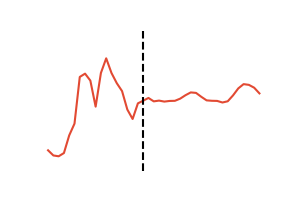

In [29]:
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[3,2]
plt.plot(cathode_price_series_baseline_baseline[40:], label='Baseline')

# plt.plot(cathode_price_series_baseline_rs10.loc['20180101':], label='10%')
# plt.plot(cathode_price_series_baseline_rs20.loc['20180101':], label='20%')
# plt.plot(cathode_price_series_baseline_rs50.loc['20180101':], label='50%')
# plt.plot(cathode_price_series_baseline_rs100.loc['20180101':], label='Maximum')

# plt.plot(cathode_price_series_baseline_prs10.loc['20180101':], label='10%')
# plt.plot(cathode_price_series_baseline_prs20.loc['20180101':], label='20%')
# plt.plot(cathode_price_series_baseline_prs50.loc['20180101':], label='50%')
# plt.plot(cathode_price_series_baseline_prs100.loc['20180101':], label='Maximum')

# plt.plot(cathode_price_series_china_ban_reuter1.loc['20180101':], label='Reuter 1')
# plt.plot(cathode_price_series_china_ban_reuter5.loc['20180101':], label='Reuter 5')
# plt.plot(cathode_price_series_china_ban_reuterall.loc['20180101':], label='Reuter All')
#plt.plot(cathode_price_series_china_ban_smm1.loc['20180101':], label='SMM 1')
# plt.plot(cathode_price_series_china_ban_smm5.loc['20180101':], label='SMM 5')
# plt.plot(cathode_price_series_china_ban_smmall.loc['20180101':], label='SMM All')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [1000, 11700], 'k--')
#plt.legend()
plt.xlabel('Year')
plt.ylabel('Cathode price (USD/t)')
plt.axis('off')

plt.show()

In [23]:
np.log(cathode_price_series_baseline_baseline.loc[:'20180101']).diff().std()

0.2248427421465104

In [24]:
np.log(cathode_price_series_baseline_baseline.loc['20190101':]).diff().std()

0.03622136046908766

### TCRC

<IPython.core.display.Javascript object>


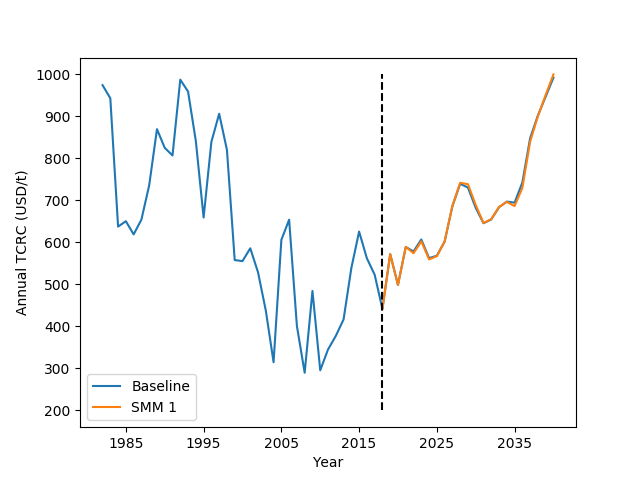

In [77]:
%matplotlib notebook
# plt.style.use('ggplot')
plt.plot(tcrc_series_baseline_baseline, label='Baseline')
# plt.plot(tcrc_series_low_rpe_baseline, label='Low RPE')
# plt.plot(tcrc_series_high_rpe_baseline, label='High RPE')

# plt.plot(tcrc_series_baseline_rs10.loc['20180101':], label='10%')
# plt.plot(tcrc_series_baseline_rs20.loc['20180101':], label='20%')
# plt.plot(tcrc_series_baseline_rs50.loc['20180101':], label='50%')
# plt.plot(tcrc_series_baseline_rs100.loc['20180101':], label='100%')

# plt.plot(tcrc_series_baseline_prs10.loc['20180101':], label='10%')
# plt.plot(tcrc_series_baseline_prs20.loc['20180101':], label='20%')
# plt.plot(tcrc_series_baseline_prs50.loc['20180101':], label='50%')
# plt.plot(tcrc_series_baseline_prs100.loc['20180101':], label='100%')

# plt.plot(tcrc_series_china_ban_reuter1.loc['20180101':], label='Reuter 1')
# plt.plot(tcrc_series_china_ban_reuter5.loc['20180101':], label='Reuter 5')
# plt.plot(tcrc_series_china_ban_reuterall.loc['20180101':], label='Reuter All')
plt.plot(tcrc_series_china_ban_smm1.loc['20180101':], label='SMM 1')
# plt.plot(tcrc_series_china_ban_smm5.loc['20180101':], label='SMM 5')
# plt.plot(tcrc_series_china_ban_smmall.loc['20180101':], label='SMM All')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [200, 1000], 'k--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual TCRC (USD/t)')
plt.show()

In [26]:
np.log(tcrc_series_baseline_baseline.loc[:'20180101']).diff().std()

0.24795426730777523

In [27]:
np.log(tcrc_series_baseline_baseline.loc['20190101':]).diff().std()

0.07331273746179713

### No.2 spread

<IPython.core.display.Javascript object>


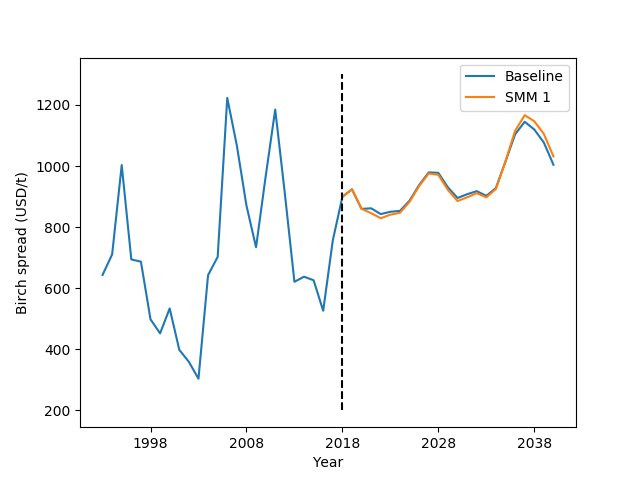

In [78]:
%matplotlib notebook
# plt.style.use('ggplot')
plt.plot(sp2_series_baseline_baseline, label='Baseline')
# plt.plot(sp2_series_baseline_prs10.loc['20180101':], label='10%')
# plt.plot(sp2_series_baseline_prs20.loc['20180101':], label='20%')
# plt.plot(sp2_series_baseline_prs50.loc['20180101':], label='50%')
# plt.plot(sp2_series_baseline_prs100.loc['20180101':], label='100%')

# plt.plot(sp2_series_china_ban_reuter1.loc['20180101':], label='Reuter 1')
# plt.plot(sp2_series_china_ban_reuter5.loc['20180101':], label='Reuter 5')
# plt.plot(sp2_series_china_ban_reuterall.loc['20180101':], label='Reuter All')
plt.plot(sp2_series_china_ban_smm1.loc['20180101':], label='SMM 1')
# plt.plot(sp2_series_china_ban_smm5.loc['20180101':], label='SMM 5')
# plt.plot(sp2_series_china_ban_smmall.loc['20180101':], label='SMM All')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [200, 1300], 'k--')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Birch spread (USD/t)')
plt.show()

### No.2 spread and cathode corr

In [179]:
print(sp2_series_baseline_rs50.diff().loc[:'20180101'].corr(cathode_price_series_baseline_rs50.diff().loc[:'20180101']))
print(sp2_series_baseline_rs50.diff().loc['20190101':].corr(cathode_price_series_baseline_rs50.diff().loc['20190101':]))

0.849067876386673
0.8558437563704796


## Displacement

<IPython.core.display.Javascript object>


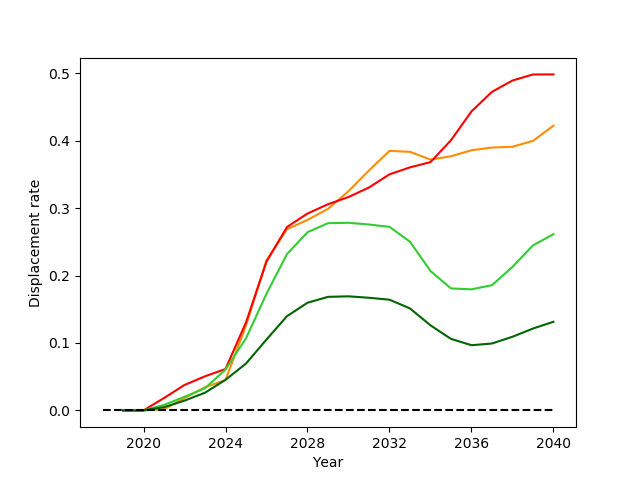

In [81]:
%matplotlib notebook

# plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
# plt.plot(displacement_low_sre_sm.loc['20190101':], '--', label='Low')
# plt.plot(displacement_high_sre_sm.loc['20190101':], '--', label='High')

# plt.plot(displacement_baseline_sm.loc['20190101':], label='1 Year')
# plt.plot(displacement_baseline_10sm.loc['20190101':], label='10 year')
# plt.plot(displacement_baseline_5sm.loc['20190101':], label='5 year')
# plt.plot(displacement_baseline_psm.loc['20190101':], label='Permanent')

# plt.plot(displacement_baseline_rs10.loc['20190101':], label='10%')
# plt.plot(displacement_baseline_rs20.loc['20190101':], label='20%')
# plt.plot(displacement_baseline_rs50.loc['20190101':], label='50%')
# plt.plot(displacement_baseline_rs100.loc['20190101':], label='Maximum')

plt.plot(displacement_baseline_prs10.loc['20190101':], label='10%', color='darkorange')
plt.plot(displacement_baseline_prs20.loc['20190101':], label='20%', color='red')
plt.plot(displacement_baseline_prs50.loc['20190101':], label='50%', color='limegreen')
plt.plot(displacement_baseline_prs100.loc['20190101':], label='100%', color='darkgreen')

# plt.plot(displacement_china_ban_reuter1.loc['20190101':], label='Reuter 1')
# plt.plot(displacement_china_ban_reuter5.loc['20190101':], label='Reuter 5')
# plt.plot(displacement_china_ban_reuterall.loc['20190101':], label='Reuter All')
# plt.plot(displacement_china_ban_smm1.loc['20190101':], label='SMM 1')
# plt.plot(displacement_china_ban_smm5.loc['20190101':], label='SMM 5')
# plt.plot(displacement_china_ban_smmall.loc['20190101':], label='SMM All')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2040,1,1)], [0, 0], 'k--')
plt.xlabel('Year')
plt.ylabel('Displacement rate')
#plt.legend()
plt.show()

<IPython.core.display.Javascript object>


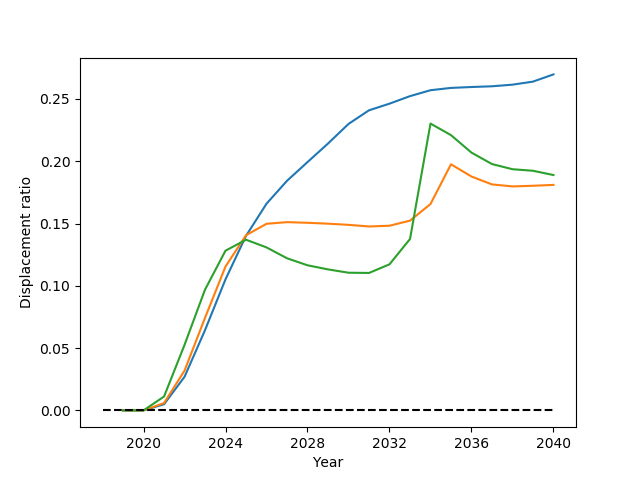

In [52]:
%matplotlib notebook
# plt.style.use('ggplot')

# plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
# plt.plot(displacement_low_mpe_sm.loc['20190101':], label='Low MPE')
# plt.plot(displacement_high_mpe_sm.loc['20190101':], label='High MPE')

# plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
# plt.plot(displacement_low_rpe_sm.loc['20190101':], label='Low RPEs')
# plt.plot(displacement_high_rpe_sm.loc['20190101':], label='High RPEs')

# plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
# plt.plot(displacement_low_sre_sm.loc['20190101':], label='Low SREs')
# plt.plot(displacement_high_sre_sm.loc['20190101':], label='High SREs')

plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
plt.plot(displacement_200_de_sm.loc['20190101':], label='200% DEs')
plt.plot(displacement_400_de_sm.loc['20190101':], label='400% DEs')

# plt.plot(displacement_baseline_sm.loc['20190101':], label='Baseline')
# plt.plot(displacement_low_ssde_sm.loc['20190101':], label='Low SSDE')
# plt.plot(displacement_high_ssde_sm.loc['20190101':], label='High SSDE')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2040,1,1)], [0, 0], 'k--')
plt.xlabel('Year')
plt.ylabel('Displacement ratio')
#plt.legend()
plt.show()

## Mining response

<IPython.core.display.Javascript object>


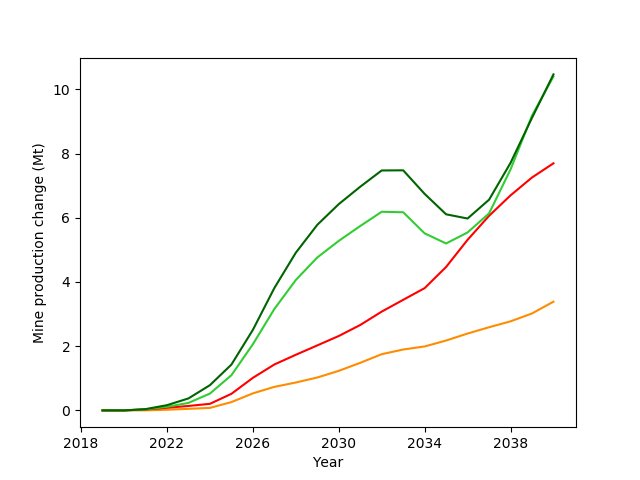

In [82]:
%matplotlib notebook

# plt.plot(mining_response_china_ban_reuter1.cumsum().loc['20190101':], label='Reuter 1')
# plt.plot(mining_response_china_ban_reuter5.cumsum().loc['20190101':], label='Reuter 5')
# plt.plot(mining_response_china_ban_reuterall.cumsum().loc['20190101':], label='Reuter All')
# plt.plot(mining_response_china_ban_smm1.cumsum().loc['20190101':], label='SMM 1')
# plt.plot(mining_response_china_ban_smm5.cumsum().loc['20190101':], label='SMM 5')
# plt.plot(mining_response_china_ban_smmall.cumsum().loc['20190101':], label='SMM All')

plt.plot(-mining_response_baseline_prs10.cumsum().loc['20190101':].div(1e3), label='10%', color='darkorange')
plt.plot(-mining_response_baseline_prs20.cumsum().loc['20190101':].div(1e3), label='20%', color='red')
plt.plot(-mining_response_baseline_prs50.cumsum().loc['20190101':].div(1e3), label='50%', color='limegreen')
plt.plot(-mining_response_baseline_prs100.cumsum().loc['20190101':].div(1e3), label='Maximum', color='darkgreen')

plt.ylabel('Mine production change (Mt)')
plt.xlabel('Year')
#plt.legend()
plt.show()

<IPython.core.display.Javascript object>


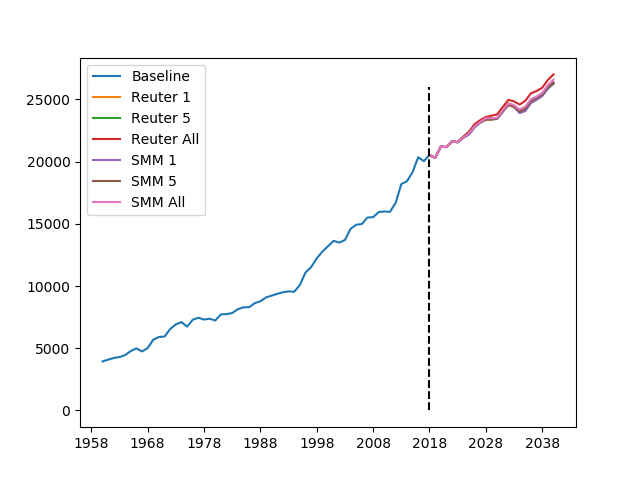

In [46]:
%matplotlib notebook
#plt.style.use('ggplot')
plt.plot(mining_supply_baseline_baseline, label='Baseline')
# plt.plot(mining_supply_baseline_rs10.loc['20180101':], label='10%')
# plt.plot(mining_supply_baseline_rs20.loc['20180101':], label='20%')
# plt.plot(mining_supply_baseline_rs50.loc['20180101':], label='50%')
# plt.plot(mining_supply_baseline_rs100.loc['20180101':], label='100%')

# plt.plot(mining_supply_baseline_prs10.loc['20180101':], label='p10%')
# plt.plot(mining_supply_baseline_prs20.loc['20180101':], label='p20%')
# plt.plot(mining_supply_baseline_prs50.loc['20180101':], label='p50%')
# plt.plot(mining_supply_baseline_prs100.loc['20180101':], label='p100%')

plt.plot(mining_supply_china_ban_reuter1.loc['20180101':], label='Reuter 1')
plt.plot(mining_supply_china_ban_reuter5.loc['20180101':], label='Reuter 5')
plt.plot(mining_supply_china_ban_reuterall.loc['20180101':], label='Reuter All')
plt.plot(mining_supply_china_ban_smm1.loc['20180101':], label='SMM 1')
plt.plot(mining_supply_china_ban_smm5.loc['20180101':], label='SMM 5')
plt.plot(mining_supply_china_ban_smmall.loc['20180101':], label='SMM All')

# plt.plot(mining_supply_baseline_irs100.loc['20180101':], label='i100%')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [0, 26000], 'k--')
plt.legend()
plt.show()

## Shock

<IPython.core.display.Javascript object>


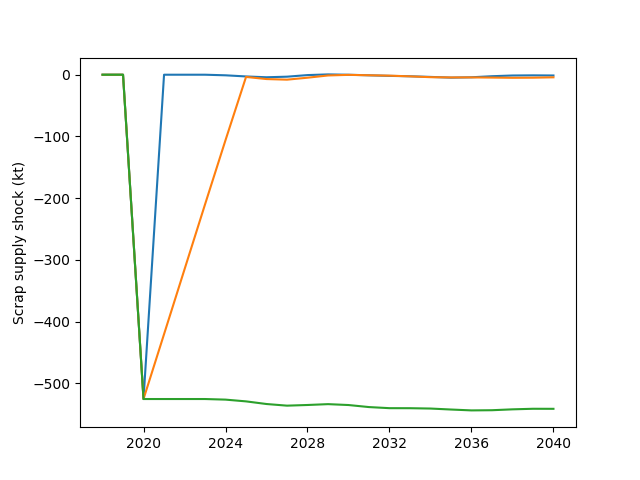

In [81]:
%matplotlib notebook
#plt.style.use('ggplot')
plt.plot(shock_china_ban_reuter1.loc['20180101':], label='Reuter 1')
plt.plot(shock_china_ban_reuter5.loc['20180101':], label='Reuter 5')
plt.plot(shock_china_ban_reuterall.loc['20180101':], label='Reuter All')
# plt.plot(shock_china_ban_smm1.loc['20180101':], label='SMM 1')
# plt.plot(shock_china_ban_smm5.loc['20180101':], label='SMM 5')
# plt.plot(shock_china_ban_smmall.loc['20180101':], label='SMM All')

plt.ylabel('Scrap supply shock (kt)')
#plt.legend(loc=3)
plt.show()

## Mine level investigation

In [49]:
mine_life_max_sesd_baseline_header=pd.read_excel('minelife_max_sesd_baseline.xlsx', sheet_name='Sheet1', index=[0], header=None)\
.iloc[:2, 1:].ffill(axis=1)
mine_life_max_sesd_baseline=pd.read_excel('minelife_max_sesd_baseline.xlsx', sheet_name='Sheet1', index_col=0, skiprows=[0,1], 
                                          header=None)
mine_life_max_sesd_baseline.columns=pd.MultiIndex.from_arrays(mine_life_max_sesd_baseline_header.values)

FileNotFoundError: [Errno 2] No such file or directory: 'minelife_max_sesd_baseline.xlsx'

In [218]:
mine_life_max_sesd_1_header=pd.read_excel('minelife_max_sesd_1.xlsx', sheet_name='Sheet1', index=[0], header=None)\
.iloc[:2, 1:].ffill(axis=1)
mine_life_max_sesd_1=pd.read_excel('minelife_max_sesd_1.xlsx', sheet_name='Sheet1', index_col=0, skiprows=[0,1], 
                                          header=None)
mine_life_max_sesd_1.columns=pd.MultiIndex.from_arrays(mine_life_max_sesd_1_header.values)

Closing?

In [262]:
old_mine_index=mine_life_max_sesd_baseline.columns.get_level_values(0).unique()[:374]

mine_life_max_sesd_baseline_old=mine_life_max_sesd_baseline.loc[:, idx[old_mine_index, :]]
mine_life_max_sesd_1_old=mine_life_max_sesd_1.loc[:, idx[old_mine_index, :]]

mining_supply_max_sesd_baseline_old=mine_life_max_sesd_baseline_old.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
mining_supply_max_sesd_1_old=mine_life_max_sesd_1_old.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)

Opening?

In [263]:
new_mine_index_max_sesd_baseline=mine_life_max_sesd_baseline.columns.get_level_values(0).unique()[374:]
new_mine_index_max_sesd_1=mine_life_max_sesd_1.columns.get_level_values(0).unique()[374:]

mine_life_max_sesd_baseline_new=mine_life_max_sesd_baseline.loc[:, idx[new_mine_index_max_sesd_baseline, :]]
mine_life_max_sesd_1_new=mine_life_max_sesd_1.loc[:, idx[new_mine_index_max_sesd_1, :]]

mining_supply_max_sesd_baseline_new=mine_life_max_sesd_baseline_new.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
mining_supply_max_sesd_1_new=mine_life_max_sesd_1_new.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)

<IPython.core.display.Javascript object>


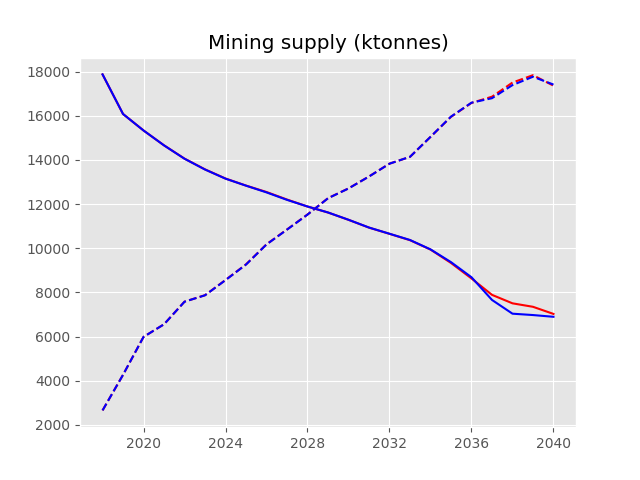

In [377]:
%matplotlib notebook
plt.style.use('ggplot')
plt.plot(mining_supply_max_sesd_baseline_old, 'r', label='Max SESD baseline')
plt.plot(mining_supply_max_sesd_1_old.loc['20180101':], 'b', label='Max SESD 1%')

plt.plot(mining_supply_max_sesd_baseline_new, 'r--', label='Max SESD baseline')
plt.plot(mining_supply_max_sesd_1_new.loc['20180101':], 'b--', label='Max SESD 1%')

plt.title('Mining supply (ktonnes)')
#plt.legend()
plt.show()

OK, so for closing which mines?

In [398]:
late_prod_max_sesd_baseline_old=\
mine_life_max_sesd_baseline_old.loc['20350101':, idx[:, 'Recovered metal production (kt)']].sum()>0
late_prod_max_sesd_1_old=\
mine_life_max_sesd_1_old.loc['20350101':, idx[:, 'Recovered metal production (kt)']].sum()>0

In [399]:
late_prod_index_max_sesd_baseline_old=[i for i in late_prod_max_sesd_baseline_old.index.get_level_values(0) if \
late_prod_max_sesd_baseline_old.loc[i].values]

late_prod_index_max_sesd_1_old=[i for i in late_prod_max_sesd_1_old.index.get_level_values(0) if \
late_prod_max_sesd_1_old.loc[i].values]

In [408]:
mine_life_late_max_sesd_baseline_old=\
mine_life_max_sesd_baseline_old.loc['20350101':, idx[late_prod_index_max_sesd_baseline_old, 'Recovered metal production (kt)']]
mine_life_late_max_sesd_1_old=\
mine_life_max_sesd_1_old.loc['20350101':, idx[late_prod_index_max_sesd_1_old, 'Recovered metal production (kt)']]

In [403]:
years_close_max_sesd_baseline=pd.Series(0, index=late_prod_index_max_sesd_baseline_old)
years_close_max_sesd_1=pd.Series(0, index=late_prod_index_max_sesd_1_old)

In [404]:
for i in late_prod_index_max_sesd_baseline_old:
    prod_i=mine_life_late_sesd_baseline_old.loc[:, idx[i, 'Recovered metal production (kt)']]
    if 0 in list(prod_i):
        years_close_max_sesd_baseline.loc[i]=prod_i.idxmin().year
        
for i in late_prod_index_max_sesd_1_old:
    prod_i=mine_life_late_sesd_1_old.loc[:, idx[i, 'Recovered metal production (kt)']]
    if 0 in list(prod_i):
        years_close_max_sesd_1.loc[i]=prod_i.idxmin().year

In [347]:
years_close_df=pd.DataFrame({'Max SESD 1%': years_close_max_sesd_1, 'Max SESD Baseline': years_close_max_sesd_baseline})
years_close_df.to_excel('Years close dataframe.xlsx')

In [405]:
max_sesd_1_impact_index=[24470, 24518, 24673, 24733, 24783, 29853, 29924, 30678, 30768, 31528, 33190]

In [415]:
shiro=mine_life_max_sesd_1.loc[:, idx[max_sesd_1_impact_index, 'Recovered metal production (kt)']].sum(axis=1)-\
mine_life_max_sesd_baseline.loc[:, idx[max_sesd_1_impact_index, 'Recovered metal production (kt)']].sum(axis=1)

<IPython.core.display.Javascript object>


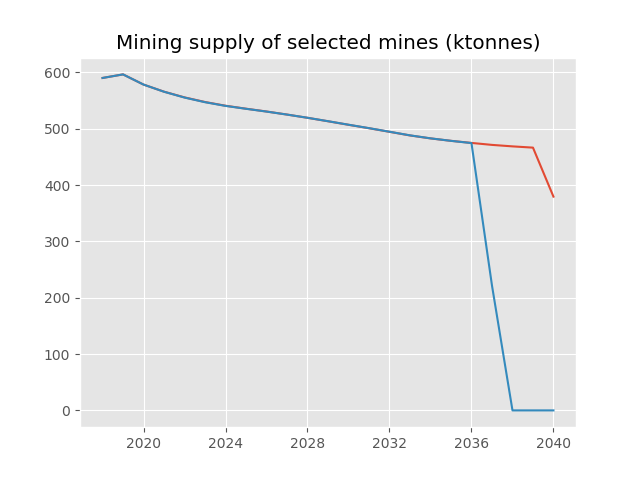

In [414]:
%matplotlib notebook
plt.style.use('ggplot')

plt.plot(mine_life_max_sesd_baseline.loc[:, idx[max_sesd_1_impact_index, 'Recovered metal production (kt)']].sum(axis=1))
plt.plot(mine_life_max_sesd_1.loc[:, idx[max_sesd_1_impact_index, 'Recovered metal production (kt)']].sum(axis=1))

plt.title('Mining supply of selected mines (ktonnes)')
plt.show()

In [ ]:
mine_life_baseline_baseline=pd.read_excel('Mine level info/')

<IPython.core.display.Javascript object>


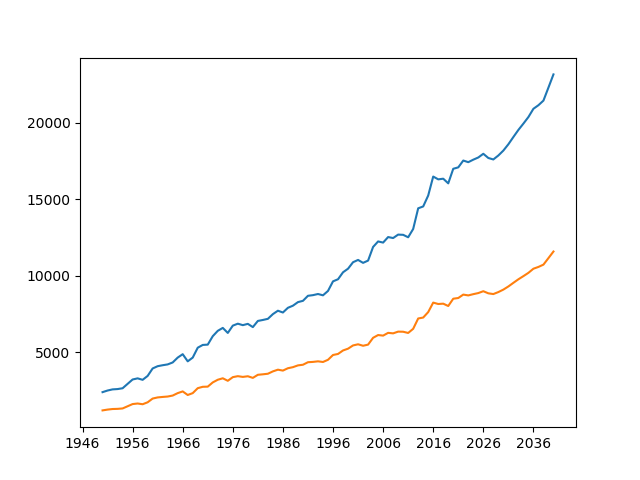

In [93]:
%matplotlib notebook

plt.plot(sd_mining_baseline_prs100.loc[:, 'Concentrate production'])
plt.plot(sd_mining_baseline_prs100.loc[:, 'Concentrate production'].div(2))


# Marginal displacements

In [66]:
marginal_sd
marginal_displacement

,Baseline,Low MPE,High MPE,Low SRE,High SRE,Low SSDE,High SSDE,Low DE,High DE
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2036-01-01,0.259576,0.159527,0.404959,0.243218,0.275302,0.203384,0.264185,0.187710,0.206921
2037-01-01,0.260160,0.159480,0.408057,0.245401,0.274448,0.207236,0.262027,0.181392,0.197723
2038-01-01,0.261451,0.159949,0.413530,0.248120,0.276183,0.211754,0.260919,0.179783,0.193591
2039-01-01,0.263898,0.161593,0.423128,0.251719,0.277630,0.217574,0.261038,0.180309,0.192342


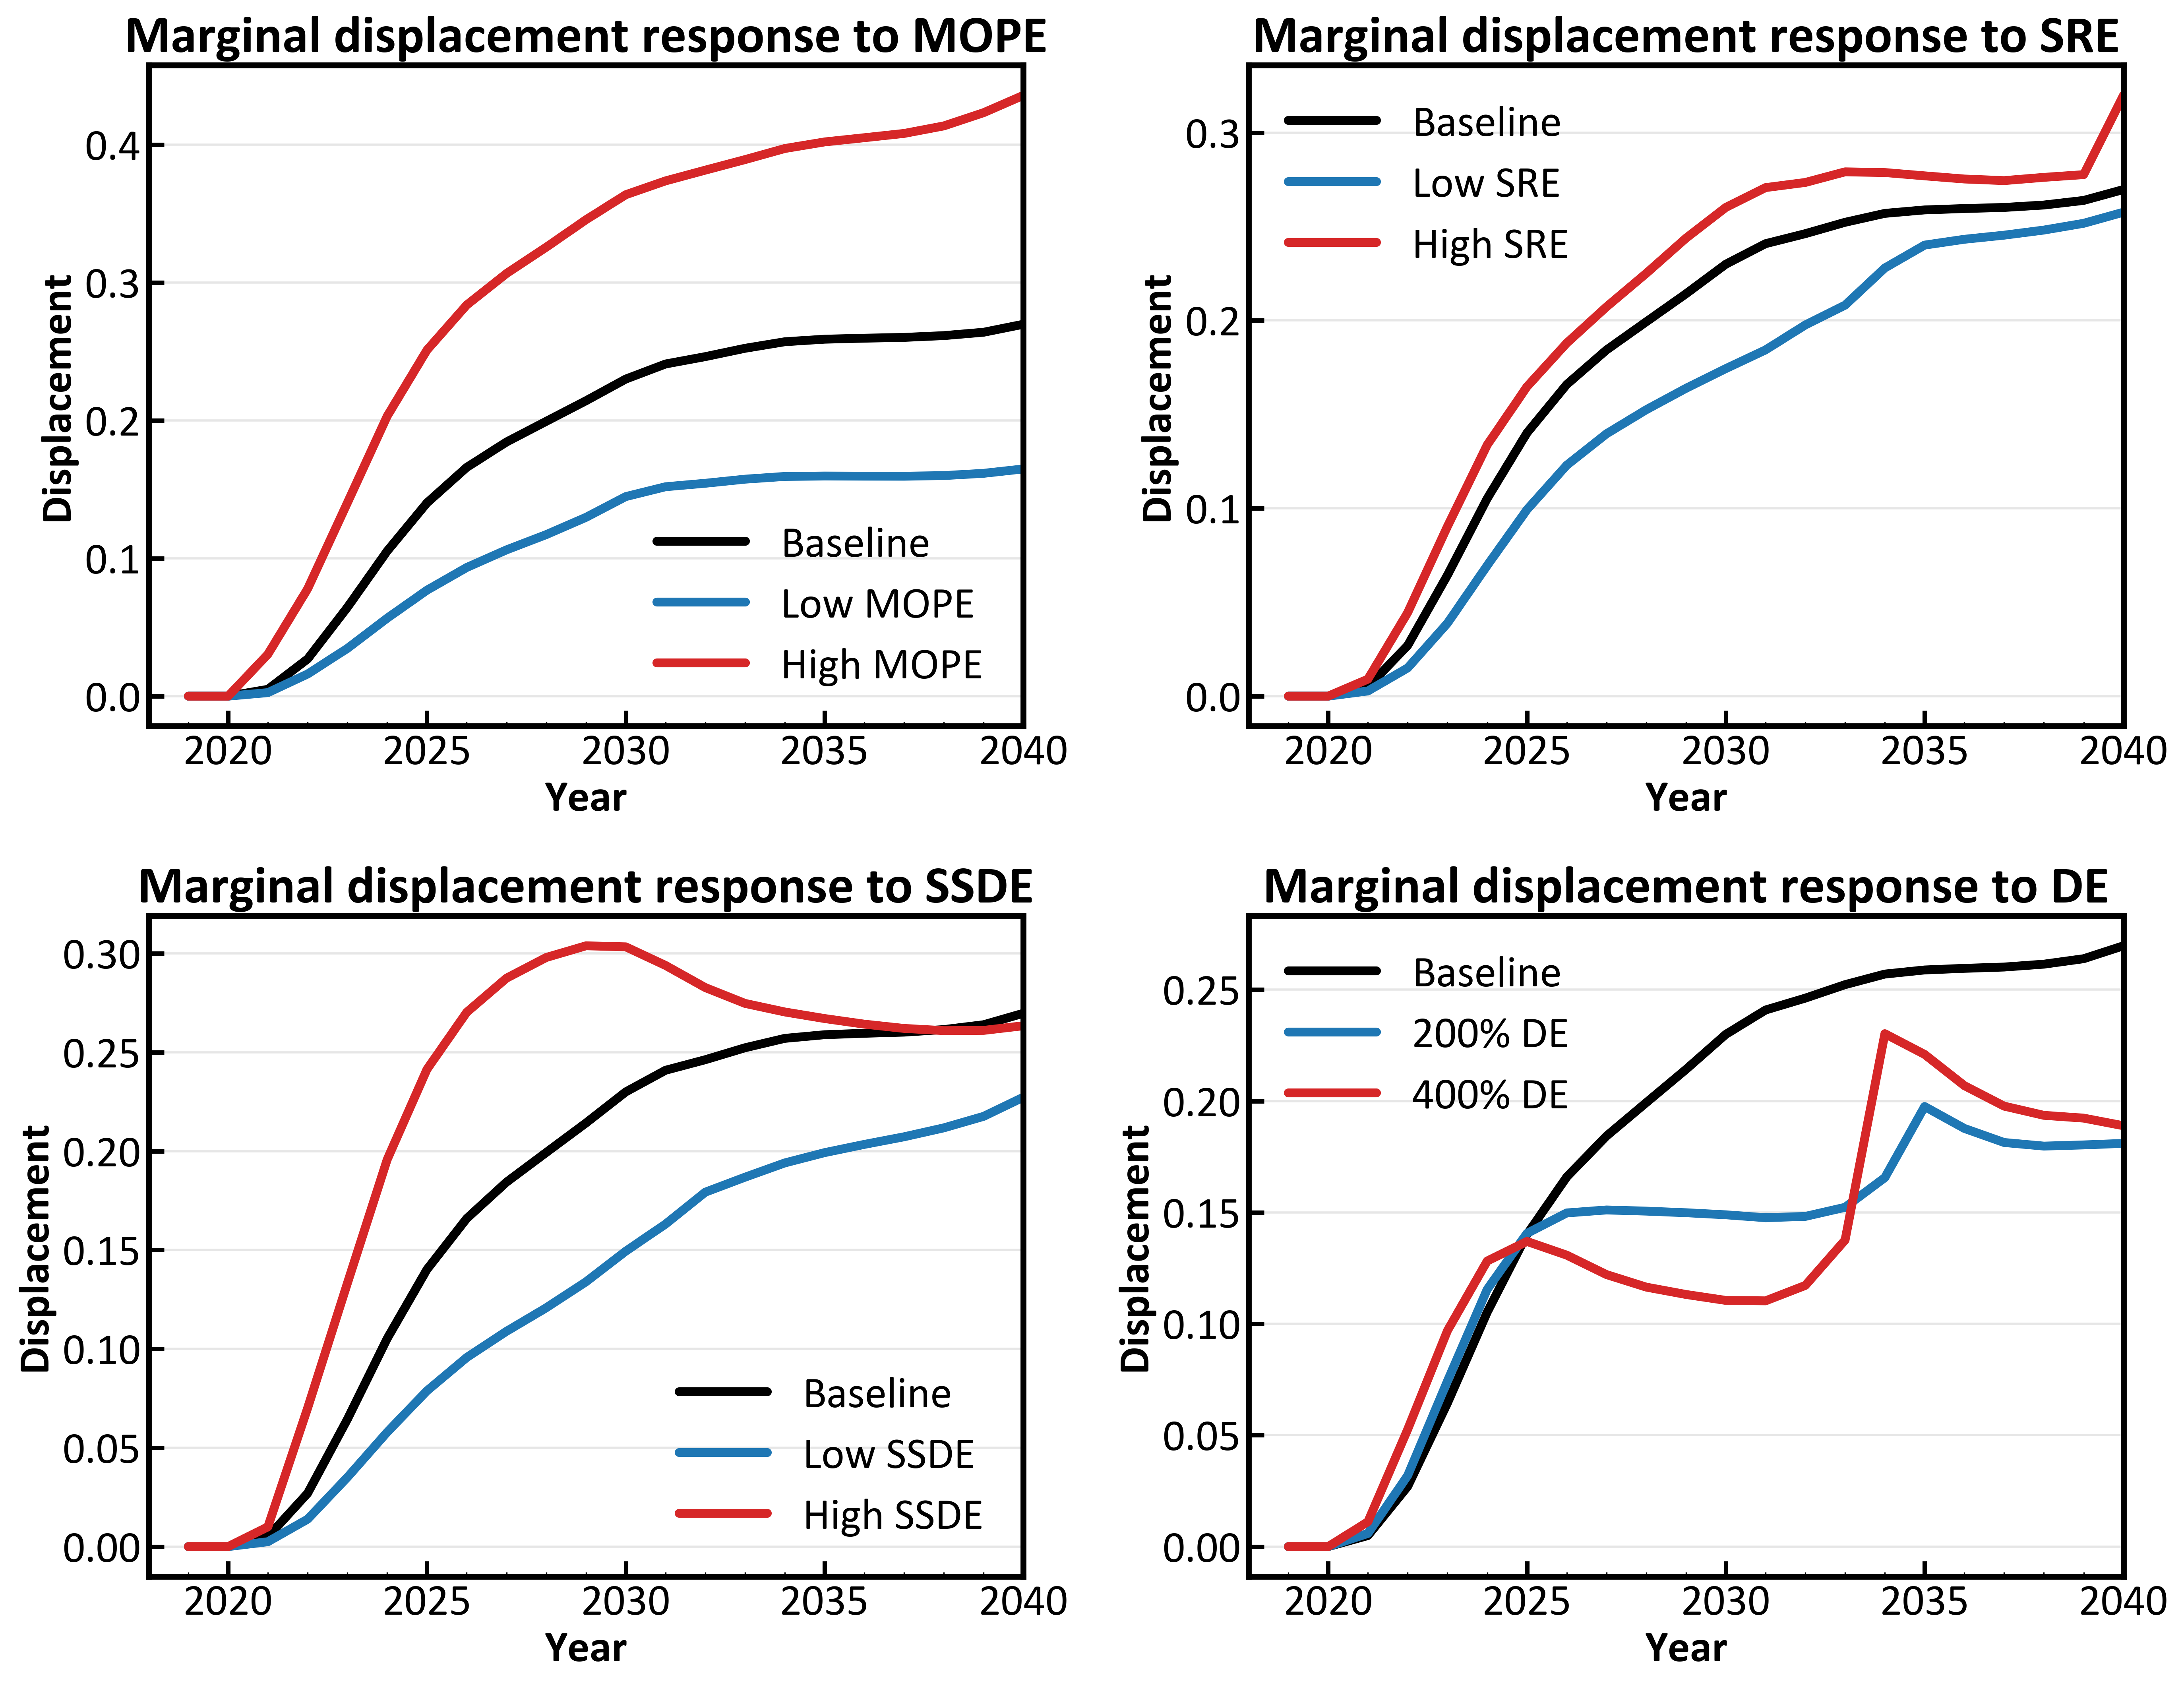

In [73]:
fig = plt.figure(figsize=(14,11),dpi=400)
ax = []
ax += [fig.add_subplot(2,2,1)]
ax += [fig.add_subplot(2,2,2)]
ax += [fig.add_subplot(2,2,3)]
ax += [fig.add_subplot(2,2,4)]
for i,a in zip(['MPE','SRE','SSDE','DE'],ax):
    marginal_displacement.loc['20180101':,'Baseline'].plot(ax=a,label='Baseline',color='k')
    marginal_displacement.loc['20180101':,[j for j in marginal_displacement.columns if ' '+i in j]].plot(ax=a,color=['tab:blue','tab:red']).grid(axis='x')
    if i == 'MPE':
        a.legend(['Baseline','Low MOPE','High MOPE'])
    elif i == 'DE':
        a.legend(['Baseline','200% DE','400% DE'])
    else:
        a.legend()
    a.set(title='Marginal displacement response to '+i.replace('MPE','MOPE'),xlabel='Year',ylabel='Displacement')
fig.tight_layout()

In [74]:
marginal_displacement

,Baseline,Low MPE,High MPE,Low SRE,High SRE,Low SSDE,High SSDE,Low DE,High DE
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2036-01-01,0.259576,0.159527,0.404959,0.243218,0.275302,0.203384,0.264185,0.187710,0.206921
2037-01-01,0.260160,0.159480,0.408057,0.245401,0.274448,0.207236,0.262027,0.181392,0.197723
2038-01-01,0.261451,0.159949,0.413530,0.248120,0.276183,0.211754,0.260919,0.179783,0.193591
2039-01-01,0.263898,0.161593,0.423128,0.251719,0.277630,0.217574,0.261038,0.180309,0.192342


In [76]:
marginal_sd.to_excel('C:/Users/ryter/Dropbox (MIT)/Group Research Folder_Olivetti/Displacement/05 Writing/Displacement paper/Source data/Figure S8 source data.xlsx')
marginal_displacement.to_excel('C:/Users/ryter/Dropbox (MIT)/Group Research Folder_Olivetti/Displacement/05 Writing/Displacement paper/Source data/Figure S8.xlsx')